# I. Linear least squares approximation

Consider a function $y = f(x)$ which is defined by a set of values $y_0, y_1, \cdots, y_n$ at points $x_0, x_1, \cdots, x_n$.

In [15]:
import numpy as np

x = [-1, -0.7, -0.43, -0.14, -0.14, 0.43, 0.71, 1, 1.29, 1.57, 1.86, 2.14, 2.43, 2.71, 3]
y = [-2.25, -0.77, 0.21, 0.44, 0.64, 0.03, -0.22, -0.84, -1.2, -1.03, -0.37, 0.61, 2.67, 5.04, 8.90]

x = np.asarray(x)
y = np.asarray(y)

### I.I. Find a best fit polynomial

$$
P_m(x) = a_0 + a_1 x + \cdots + a_m x^m
$$

using the linear least squares approach. To this end

1. implement a function which constructs the design matrix using $1, x, \cdots, x^m$ as the basis functions.

2. construct explicitly the normal system of equations of the linear least squares problem at fixed $m$.

3. Solve the normal equations to find the coefficients of $P_m(x)$ for $m = 0, 1, 2, \dots$. For the linear algebra problem, you can either use library functions (`numpy.linalg.solve`) or your LU factorization code from week 1.

(20% of the total grade)

In [16]:
def least_squares(x, y, m):
    A = np.zeros((x.shape[0], m + 1))
    for i in range(np.shape(A)[0]):
        for j in range(np.shape(A)[1]):
            A[i][j] = x[i] ** j
    return np.linalg.solve (A.T @ A, A.T @ y)

### I.II 

To find the optimal value of m, use the following criterion: take $m=0, 1, 2, \dots$, for each value of $m$ compute 

$$
\sigma_m^2 = \frac{1}{n - m} \sum_{k=0}^n \left( P_m(x_k) - y_k \right)^2
$$

And take the value of $m$, at which $\sigma_m$ stabilizes or starts increasing.

(20% of the total grade)

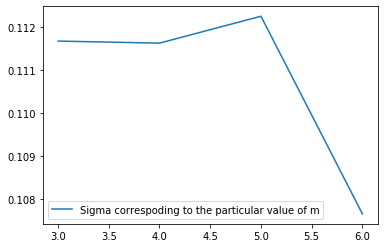

In [17]:
from numpy.polynomial.polynomial import polyval
from matplotlib import pyplot as plt

def sigma(x, y, m):
    sigma = 0
    for k in range(x.shape[0]):
        sigma += 1 / (x.shape[0] - m) * (polyval(x[k], least_squares(x, y, m)) - y[k]) ** 2
    return np.sqrt(sigma)


sigmas = [sigma(x, y, m) for m in range(3, 7)]
plt.plot(range(3, 7), sigmas, label='Sigma correspoding to the particular value of m')
plt.legend()
plt.show()

In [18]:
# We see that the optimal value of m is 4

Plot your polynomials $P_m(x)$ on one plot, together with the datapoints. Visually compare best-fit polynomials of different degrees. Is the visual comparison consistent with the optimal value of $m$?

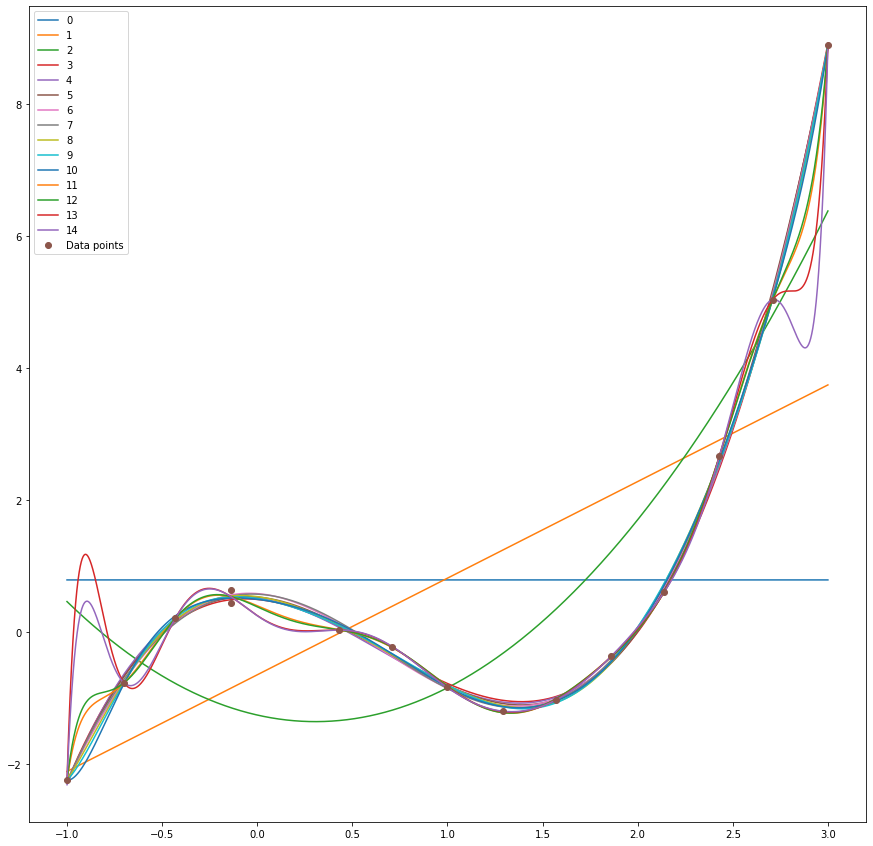

In [19]:
x_ = np.linspace(-1.0, 3.0, 10 ** 4)
plt.figure(figsize=(15,15))

for m in range(x.shape[0]):
    pm = polyval(x_, least_squares(x, y, m))
    plt.plot(x_, pm, label=m)
    
plt.plot(x, y, 'o', label='Data points')

plt.legend()
plt.show()

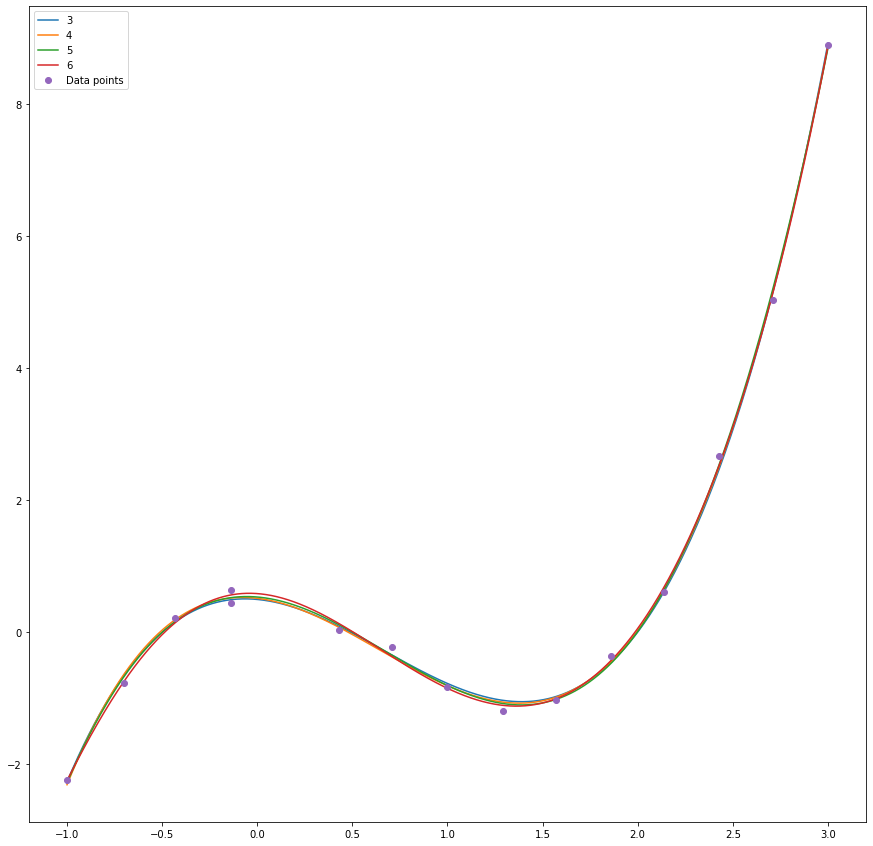

In [20]:
plt.figure(figsize=(15,15))

for m in range(3, 7):
    pm = polyval(x_, least_squares(x, y, m))
    plt.plot(x_, pm, label=m)
    
plt.plot(x, y, 'o', label='Data points')

plt.legend()
plt.show()

In [21]:
# It is obvious that the quality of interpolation is consistent with our prediction (m = 4 fits best)

### I.III. Linear least-squares using the QR factorization.

For the optimal value of $m$ from the previous part, solve the LLS problem using the QR factorization, withou ever forming the normal equations explicitly. For linear algebra, you can use standard library functions (look up `numpy.linalg.solve`, `numpy.linalg.qr` etc) or your code from previous weeks.

Compare the results with the results of solving the normal system of equations.

(20% of the grade)

In [22]:
def least_squares_qr(x, y, m=4):
    A = np.zeros((x.shape[0], m + 1))
    for i in range(np.shape(A)[0]):
        for j in range(np.shape(A)[1]):
            A[i][j] = x[i] ** j
    Q, R = np.linalg.qr(A, mode = 'complete')
    return np.linalg.solve(R[:5], (Q.T @ y)[:5])

p = least_squares(x, y, 4)
p_qr = least_squares_qr(x, y)
np.testing.assert_allclose(p, p_qr)

# II. Lagrange interpolation

### II.1 

Consider the function, $f(x) = x^2 \cos{x}$. On the interval $x\in [\pi/2, \pi]$, interpolate the function using the Lagrange interpolating polynomial of degree $m$ with $m=1, 2, 3, 4, 5$. Use the uniform mesh. Plot the resulting interpolants together with $f(x)$.

(20% of the total grade)

In [9]:
def lagrange(x, y, x0):
    L = 0
    for i in range(x.shape[0]):
        l = 1
        for j in range(x.shape[0]):
            if j != i:
                l *= (x0 - x[j]) / (x[i] - x[j])
        L += l * y[i]
    return L

[1.57079633 3.14159265]


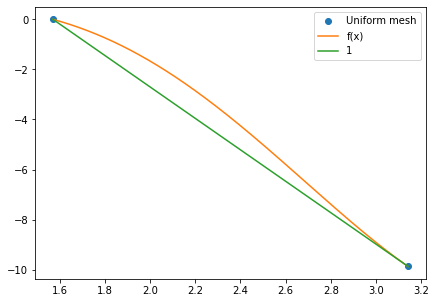

[1.57079633 2.35619449 3.14159265]


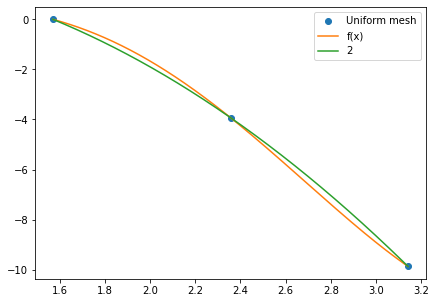

[1.57079633 2.0943951  2.61799388 3.14159265]


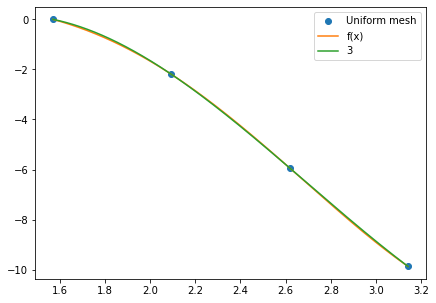

[1.57079633 1.96349541 2.35619449 2.74889357 3.14159265]


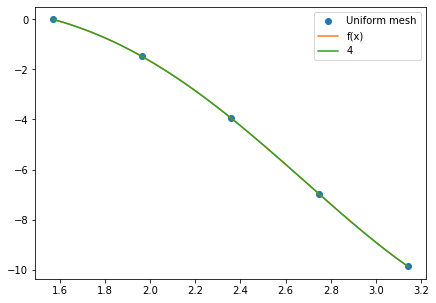

[1.57079633 1.88495559 2.19911486 2.51327412 2.82743339 3.14159265]


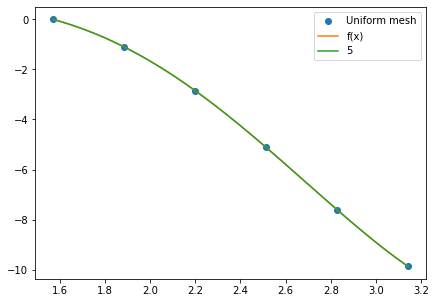

In [26]:
# раньше была неправильная степень полинома

def f(x):
    return x ** 2 * np.cos(x)

x_ = np.linspace(np.pi / 2, np.pi, 10 ** 4)

for m in range(1, 6):
    plt.figure(figsize=(7, 5))
    x = np.linspace(np.pi / 2, np.pi, m + 1)
    print(x)
    Lm = [lagrange(x, f(x), _) for _ in x_]
    plt.plot(x, f(x), 'o', label='Uniform mesh')
    plt.plot(x_, f(x_), label='f(x)')
    plt.plot(x_, Lm, label=m)
    plt.legend()
    plt.show()

### II.2. 

Repeat the previous task using the Chebyshev nodes. Compare the quality of interpolation on a uniform mesh and Chebyshev nodes for $m=3$.

(20% of the total grade)

[2.91155486 1.80083412]


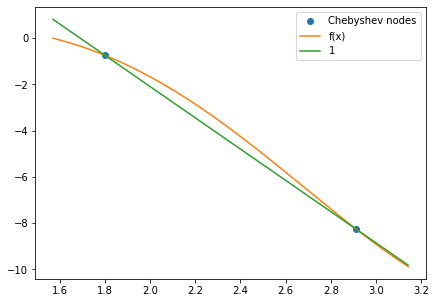

[3.03636925 2.35619449 1.67601973]


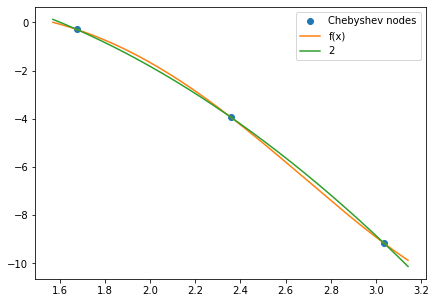

[3.08180778 2.65675336 2.05563563 1.6305812 ]


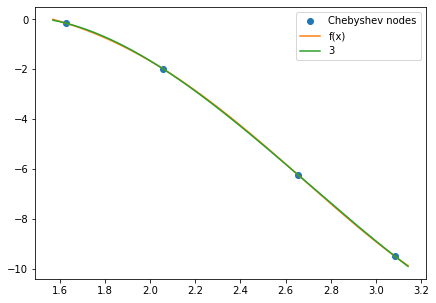

[3.10315253 2.81783995 2.35619449 1.89454903 1.60923645]


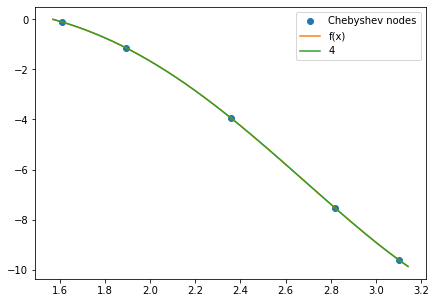

[3.11483086 2.91155486 2.55947049 2.15291849 1.80083412 1.59755812]


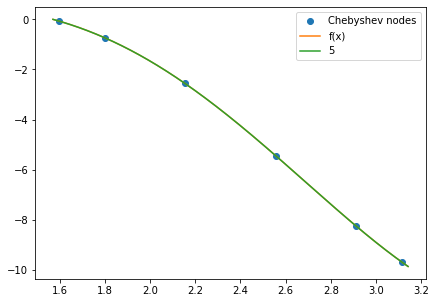

In [37]:
# аналогично

for m in range(1, 6):
    plt.figure(figsize=(7, 5))
    x = np.asarray([(3 * np.pi / 2) / 2 + (np.pi / 2) / 2 * np.cos((2 * n - 1) * np.pi / (2 * (m + 1))) for n in range(1, m + 2)])
    Lm = [lagrange(x, f(x), _) for _ in x_]
    plt.plot(x, f(x), 'o', label='Chebyshev nodes')
    plt.plot(x_, f(x_), label='f(x)')
    plt.plot(x_, Lm, label=m)
    plt.legend()
    plt.show()

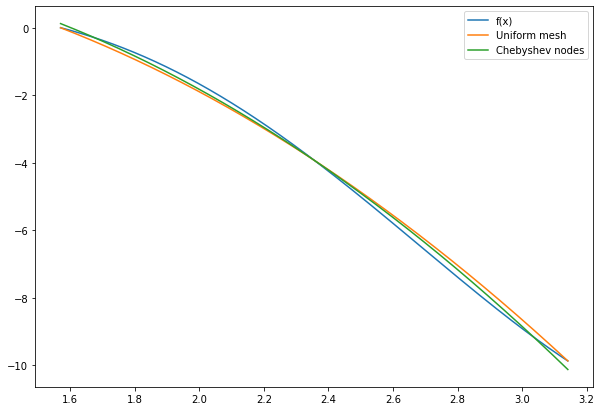

In [39]:
plt.figure(figsize=(10, 7))
x1 = np.linspace(np.pi / 2, np.pi, 3)
L31 = [lagrange(x1, f(x1), _) for _ in x_]
x2 = np.asarray([(3 * np.pi / 2) / 2 + (np.pi / 2) / 2 * np.cos((2 * n + 1) * np.pi / (2 * 3)) for n in range(3)])
L32 = [lagrange(x2, f(x2), _) for _ in x_]
plt.plot(x_, f(x_), label='f(x)')
plt.plot(x_, L31, label='Uniform mesh')
plt.plot(x_, L32, label='Chebyshev nodes')
plt.legend()
plt.show()

In [ ]:
# Comparing the quality of interpolation on a uniform mesh and Chebyshev nodes for m = 3 shows that the latter is more accurate